Dynamic Networks

In [2]:
import dynetx as dn
import networkx as nx
import numpy as np

In [3]:
g = dn.DynGraph(edge_removal=True)

''' adding interactions:
u - from node
v - to node
t - beginning timestamp
e - ending timestamp (not inclusive)
'''
g.add_interaction(u=1, v=2, t=0, e=3)
g.add_interaction(u=1, v=3, t=0, e=3)
g.add_interaction(u=1, v=4, t=3)

g.snapshots

{0: 2, 1: 2, 2: 2, 3: 2}

In [4]:
# functions have been extended to include the parameter t -> e.g. neighbors at point t.

print(g.neighbors(1, t=2))
print(g.degree(1, t=3))

[2, 3]
1


In [ ]:
g.number_of_interactions(t=4)
g.time_slice(t_from=1, t_to=3)

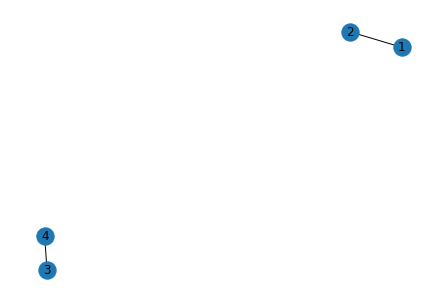

In [12]:
x = nx.Graph()
x.add_nodes_from([1,2,3,4])
x.add_edges_from([(1,2), (3,4)])
nx.draw()

In [5]:
def Erdos_Reny(n: int) -> nx.classes.graph.Graph:
    G = nx.Graph()
    G.add_node(0)
    for i in range(1,n):
        G.add_node(i)
        G.add_edge(i, np.random.choice(list(set((G.nodes())) - set([i])), 1, True)[0])
    return G

In [115]:
def GrowingNetwork(t, m, g=None, self_loops=False):
    if g is None:
        G = nx.Graph()
        G.add_nodes_from(list(range(m)))
    else:
        G = g
    for i in range(m, t+m):
        # print(G.nodes, G.edges)
        G.add_node(i)
        
        if self_loops:
            sample = set(np.random.choice(G.nodes, m, replace=True))
        else:
            sample = np.random.choice(list(G.nodes)[:-1], m, replace=False)

            print(G.nodes, sample, i)
        sample = list(sample)
        
        G.add_edges_from([(i, j) for j in sample])
    return G

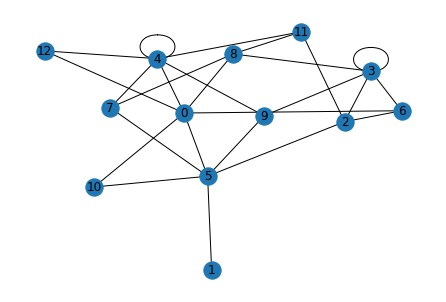

In [122]:
nx.draw(GrowingNetwork(10, 3, self_loops=True), with_labels=True)